<a href="https://colab.research.google.com/github/chidroop23/AI-ML/blob/main/Decision_Tree_Chidroop_Sagar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Decision Tree**

**Importing Libraries**

In [ ]:
# Imports needed for the script
import numpy as np
import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

**Importing the data**

In [ ]:
Url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
df = pd.read_csv(Url)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Using only mentioned  columns in assignment**

In [ ]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch' ,'Fare','Survived']]
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0


**EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [ ]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


array([[<Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Survived'}>]], dtype=object)

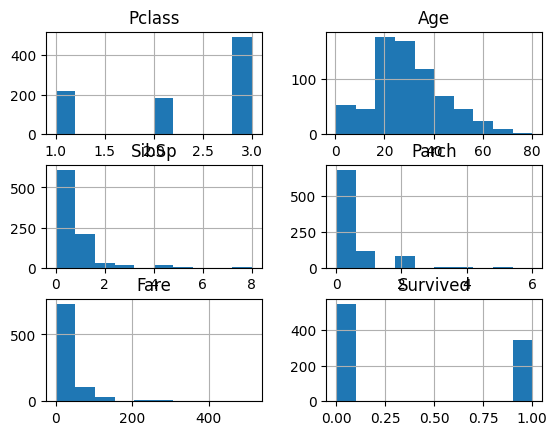

In [ ]:
df.hist()

**Checking for null values**

In [ ]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

**We can see the age column has 177 missing values**

In [ ]:
df.duplicated().sum()

114

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

0

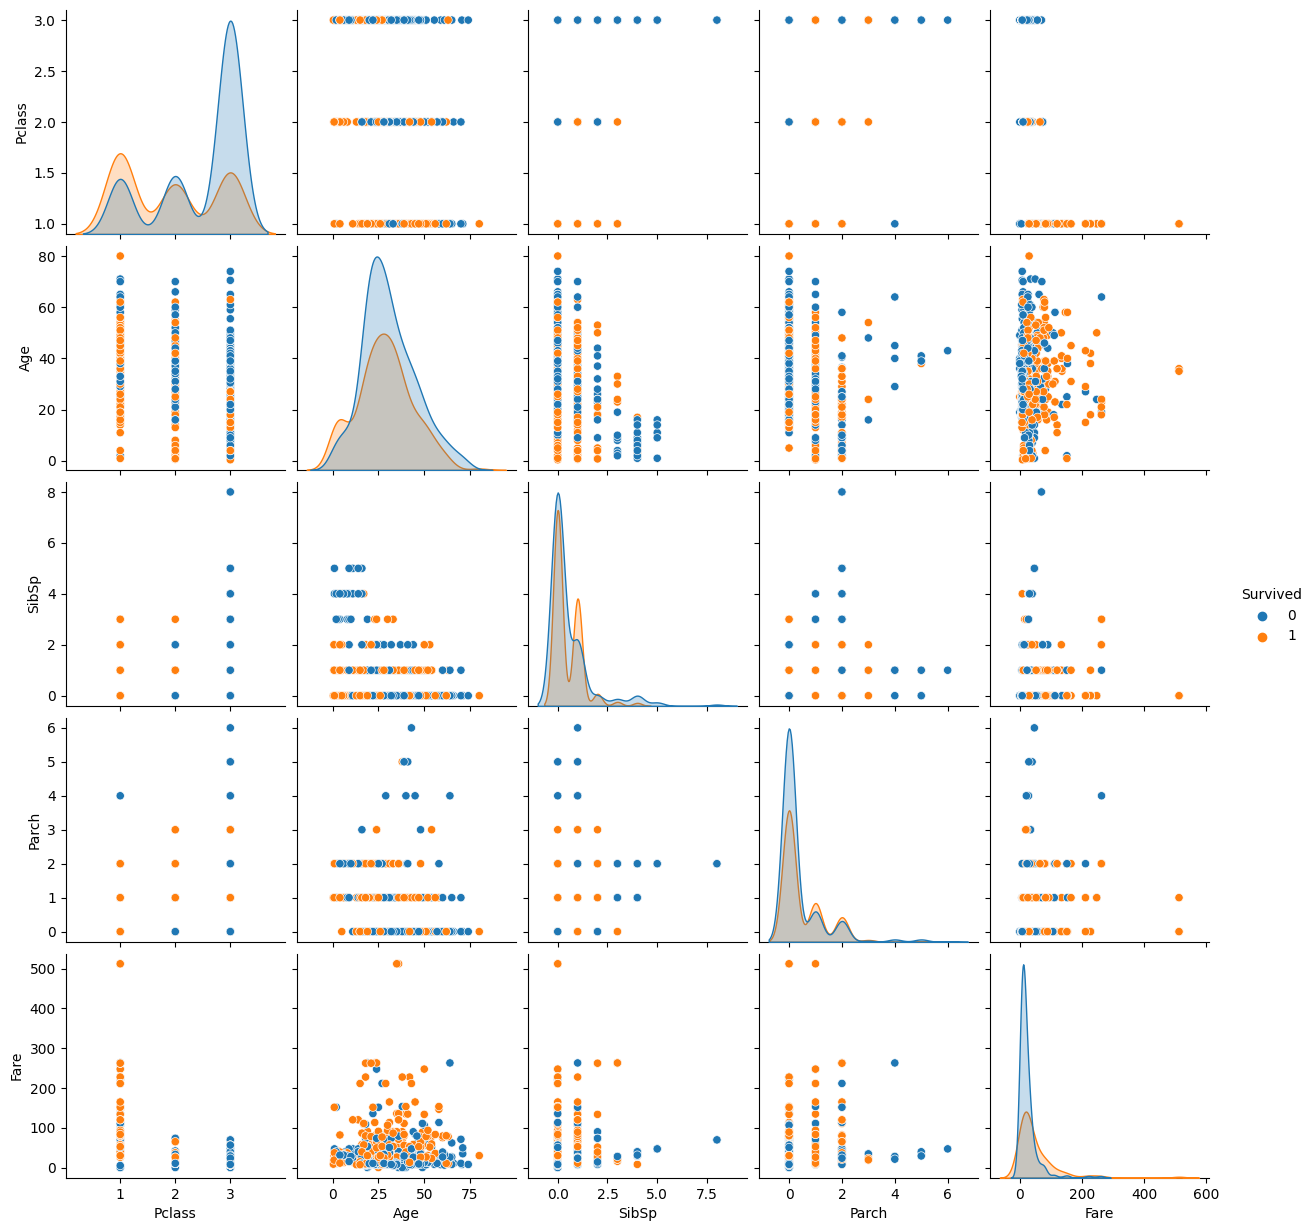

In [ ]:
sns.pairplot(df, hue='Survived');

In [ ]:
df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
            mean count  sum
Sex                        
female  0.738832   291  215
male    0.218107   486  106

In [ ]:
df[['Age', 'Survived']].groupby(['Age'], as_index=False).agg(['mean', 'count', 'sum'])

Survived          
          mean count sum
Age                     
0.42       1.0     1   1
0.67       1.0     1   1
0.75       1.0     1   1
0.83       1.0     2   2
0.92       1.0     1   1
...        ...   ...  ..
70.00      0.0     2   0
70.50      0.0     1   0
71.00      0.0     2   0
74.00      0.0     1   0
80.00      1.0     1   1

[88 rows x 3 columns]

In [ ]:
df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).agg(['mean', 'count', 'sum'])

Survived           
           mean count  sum
SibSp                     
0      0.382353   510  195
1      0.532338   201  107
2      0.444444    27   12
3      0.285714    14    4
4      0.166667    18    3
5      0.000000     5    0
8      0.000000     2    0

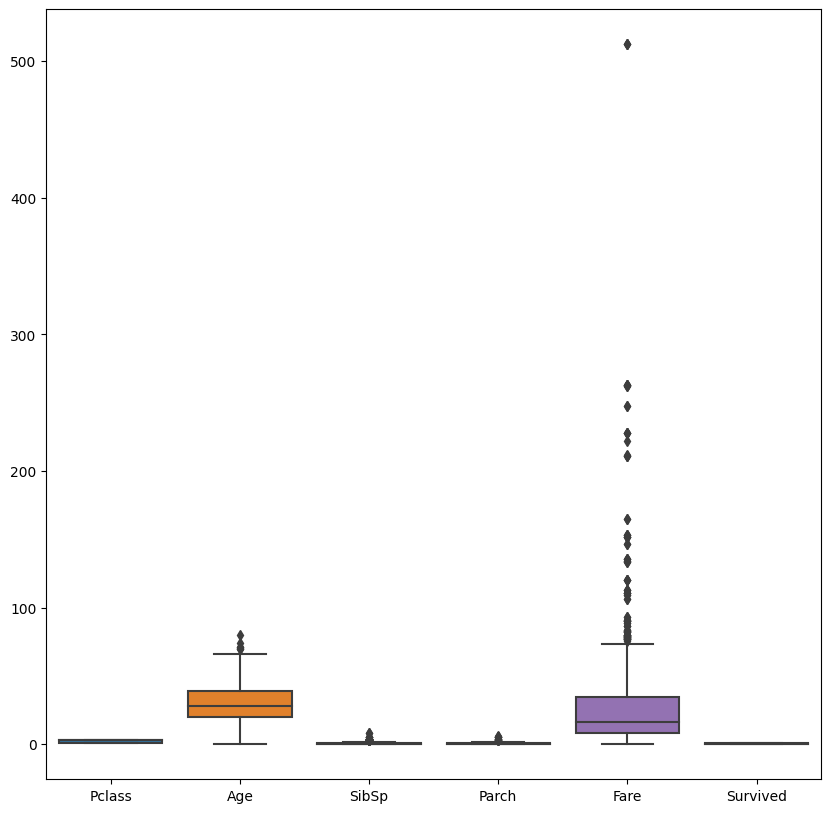

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(df);

<Axes: xlabel='Sex', ylabel='count'>

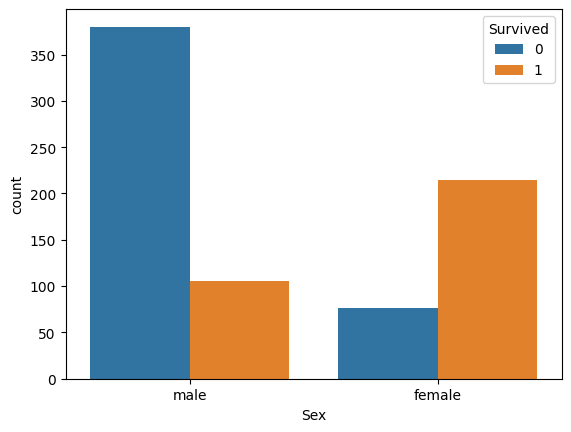

In [ ]:
sns.countplot(df, x='Sex', hue='Survived')

<ipython-input-17-6dc1c4c1753e>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

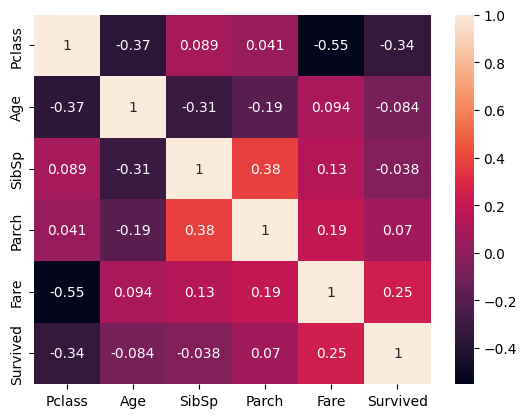

In [ ]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='Pclass', ylabel='Survived'>

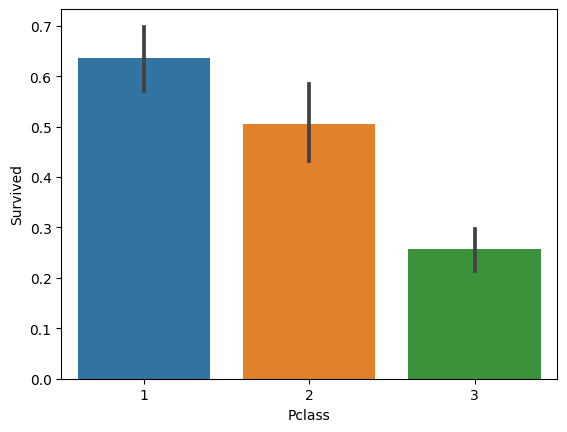

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)

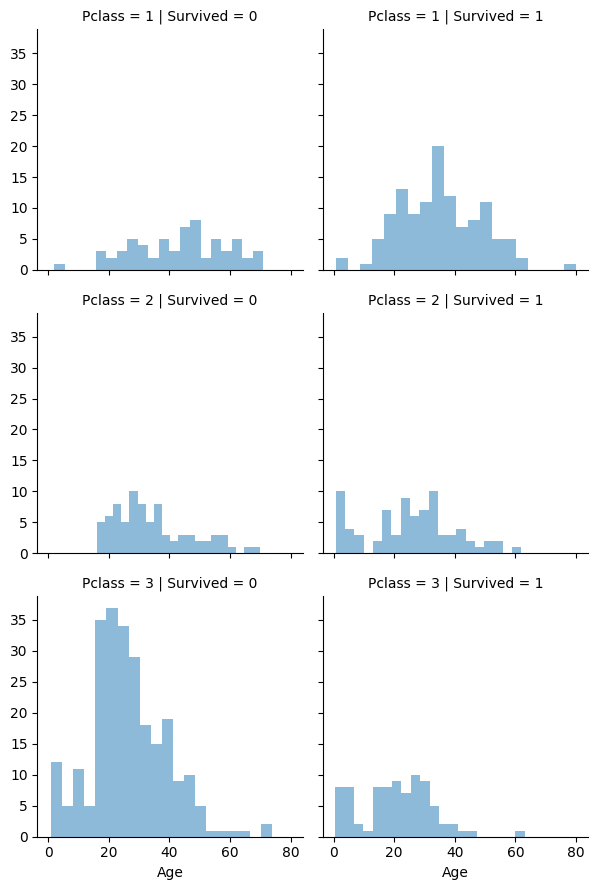

In [ ]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# **Data Preprocessing**

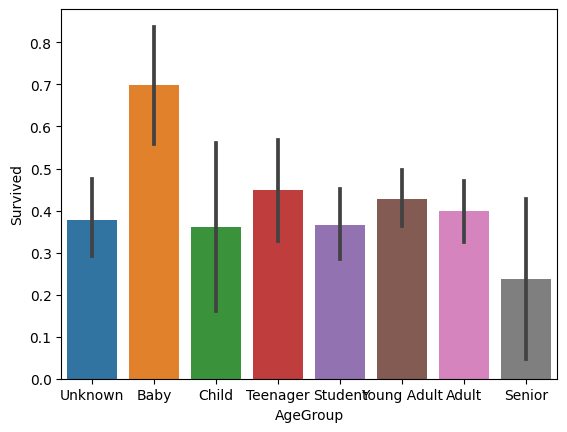

In [ ]:
#sort the ages into logical categories
df["Age"] = df["Age"].fillna(-0.5)

bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=df)
plt.show()

In [ ]:
#map each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
df['Sex'] = df['Sex'].map(sex_mapping)


In [ ]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived,AgeGroup
0,3,0,22.0,1,0,7.2500,0,Student
1,1,1,38.0,1,0,71.2833,1,Adult
2,3,1,26.0,0,0,7.9250,1,Young Adult
3,1,1,35.0,1,0,53.1000,1,Young Adult
4,3,0,35.0,0,0,8.0500,0,Young Adult


In [ ]:
#dropping the Age feature for now, might change
df= df.drop(['Age'], axis = 1)

In [ ]:
#map each Age value to a numerical value
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
df['AgeGroup'] = df['AgeGroup'].map(age_mapping)

In [ ]:
df['AgeGroup'] = df['AgeGroup'].fillna(df['AgeGroup'].median())

In [ ]:
df.head()

,Pclass,Sex,SibSp,Parch,Fare,Survived,AgeGroup
0,3,0,1,0,7.2500,0,4.0
1,1,1,1,0,71.2833,1,6.0
2,3,1,0,0,7.9250,1,5.0
3,1,1,1,0,53.1000,1,5.0
4,3,0,0,0,8.0500,0,5.0


In [ ]:
#map Fare values into groups of numerical values
df['FareBand'] = pd.qcut(df['Fare'], 4, labels = [1, 2, 3, 4])
#drop Fare values
df = df.drop(['Fare'], axis = 1)

In [ ]:
df.head()

,Pclass,Sex,SibSp,Parch,Survived,AgeGroup,FareBand
0,3,0,1,0,0,4.0,1
1,1,1,1,0,1,6.0,4
2,3,1,0,0,1,5.0,1
3,1,1,1,0,1,5.0,4
4,3,0,0,0,0,5.0,1


# **Training the Model**

In [ ]:
from sklearn.model_selection import train_test_split

y = df[['Survived']].astype('int64')
X = df.drop(columns = ['Survived'], axis=1)

In [ ]:
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X.head()

,Pclass,Sex,SibSp,Parch,AgeGroup,FareBand_2,FareBand_3,FareBand_4
0,3,0,1,0,4.0,0,0,0
1,1,1,1,0,6.0,0,0,1
2,3,1,0,0,5.0,0,0,0
3,1,1,1,0,5.0,0,0,1
4,3,0,0,0,5.0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify=y)

In [ ]:
X_train.shape

(621, 8)

In [ ]:
X_test.shape

(156, 8)

In [ ]:
y_train.value_counts(normalize=True)

Survived
0           0.586151
1           0.413849
dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

Survived
0           0.589744
1           0.410256
dtype: float64

In [ ]:
X_train.head()

,Pclass,Sex,SibSp,Parch,AgeGroup,FareBand_2,FareBand_3,FareBand_4
174,1,0,0,0,6.0,0,1,0
118,1,0,0,1,4.0,0,0,1
519,3,0,0,0,5.0,0,0,0
826,3,0,0,0,5.0,0,0,1
658,2,0,0,0,4.0,1,0,0


In [ ]:
y_train.dtypes

Survived    int64
dtype: object

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(criterion='gini', max_depth= 200)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=200)

**Performance onTrian**

In [ ]:
y_predict = dt.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       364
           1       0.87      0.77      0.82       257

    accuracy                           0.86       621
   macro avg       0.86      0.85      0.85       621
weighted avg       0.86      0.86      0.86       621



**Performance on Test Set**

In [ ]:
y_predict = dt.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        92
           1       0.79      0.66      0.72        64

    accuracy                           0.79       156
   macro avg       0.79      0.77      0.77       156
weighted avg       0.79      0.79      0.78       156



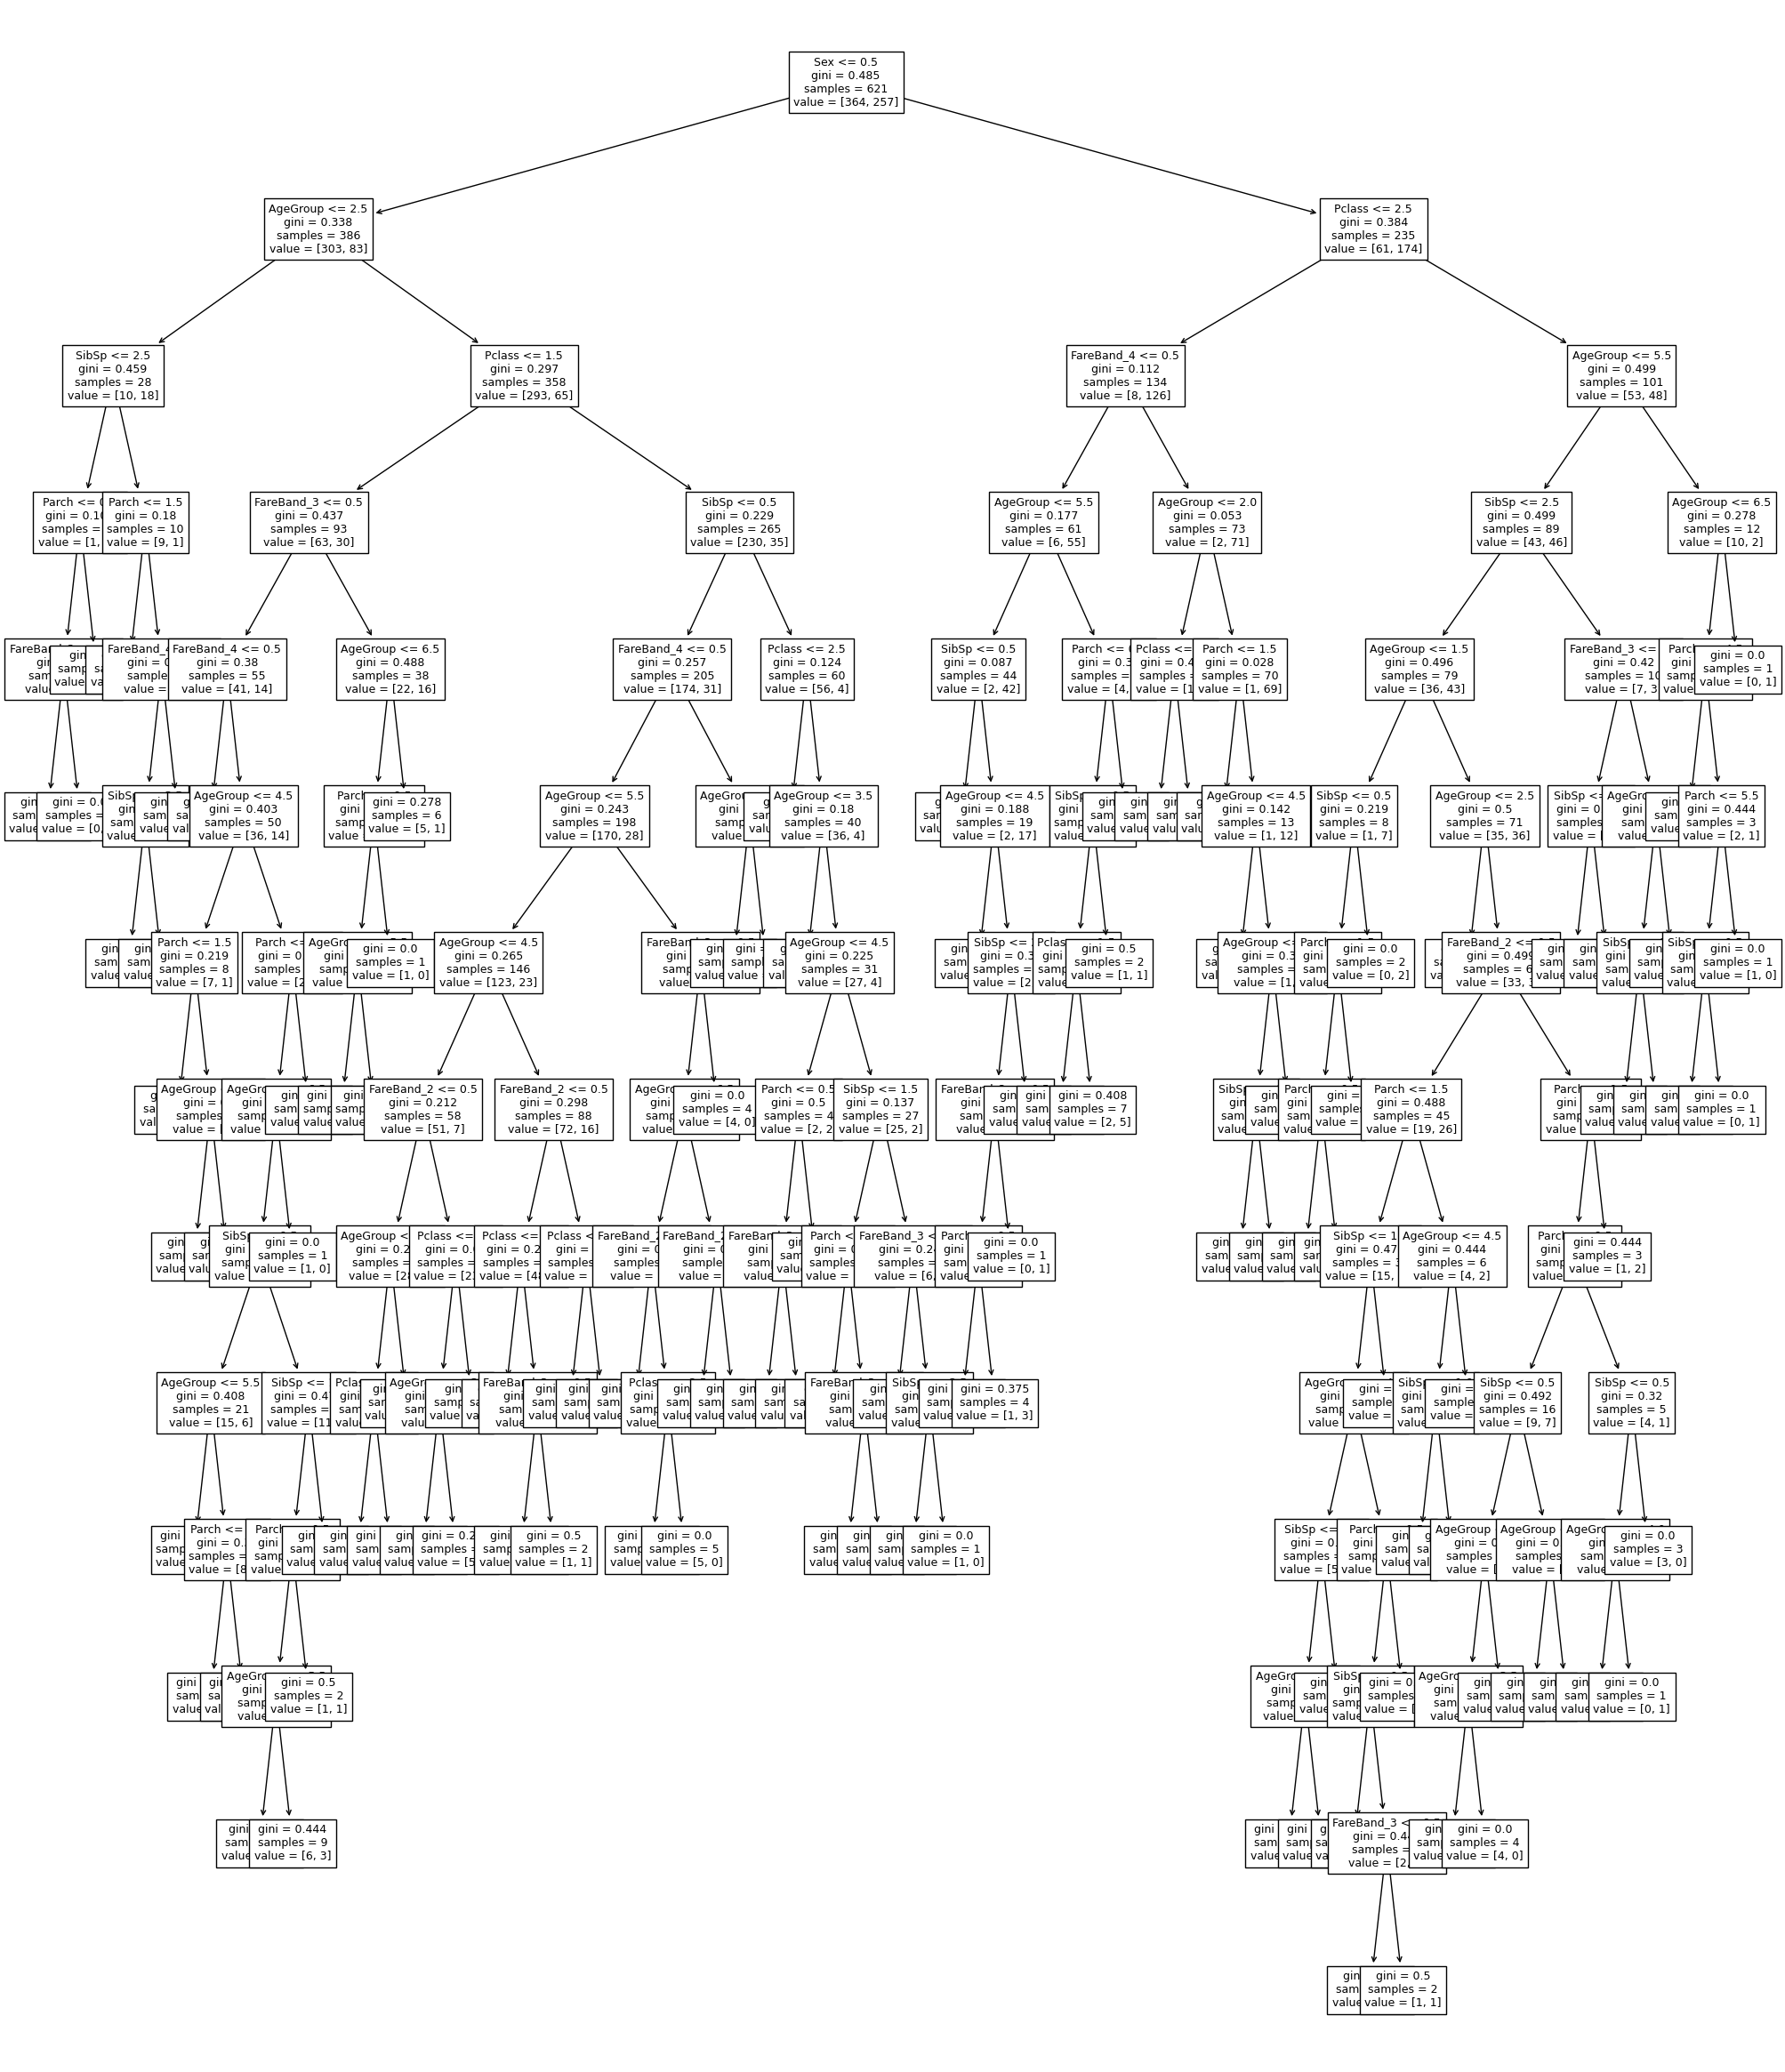

In [48]:
from sklearn import tree
# creating a list of column names
feature_names = X_train.columns.to_list()

plt.figure(figsize=(25, 30))

# plotting the decision tree
out = tree.plot_tree(dt, feature_names=feature_names,fontsize=9)
plt.show()